Goal of this notebook : perform 100 simulations of 
- exponential kernel with and without changepoint
- power law kernel with and without changepoint

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tick.plot import plot_timefunction
from tick.base import TimeFunction

In [3]:
period_length = 1

In [4]:
mu_0 = 5
mu_1 = 50
delta = 0.8

In [5]:
T = np.array([0, delta , 1], dtype=float)
Y = np.array([mu_0, mu_0, mu_1 ], dtype=float)

tf = TimeFunction((T, Y), inter_mode = TimeFunction.InterConstLeft)

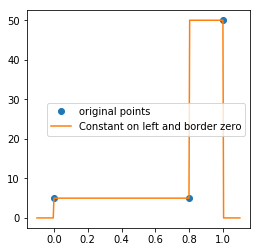

In [6]:
plot_timefunction(tf)
plt.show()

In [7]:
from tick.hawkes import SimuHawkesExpKernels
from tick.plot import plot_point_process

In [8]:
decay_exp = 100
adjacency_exp = np.array([[0.8]])
baseline = [tf]

In [9]:
hawkes = SimuHawkesExpKernels(adjacency_exp, decay_exp, baseline=baseline, end_time=period_length,
                              seed=2093, verbose=True)
hawkes.track_intensity(0.01)
hawkes.simulate()

--------------------------------------------------
Launching simulation using SimuHawkesExpKernels...
Done simulating using SimuHawkesExpKernels in 2.80e-02 seconds.


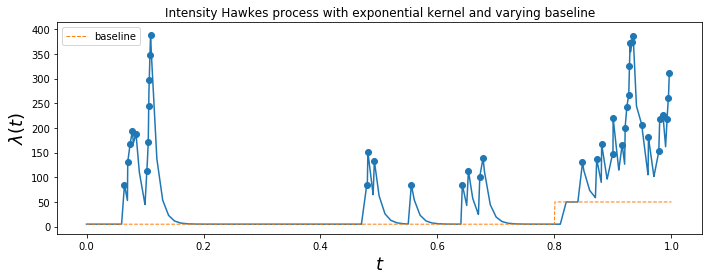

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

plot_point_process(hawkes, ax=ax)

t_values = np.linspace(0, hawkes.end_time, 1000)
ax.plot(t_values, hawkes.get_baseline_values(0, t_values), label='baseline',
        ls='--', lw=1)
ax.set_ylabel("$\lambda(t)$", fontsize=18)
ax.legend()

plt.title("Intensity Hawkes process with exponential kernel and varying "
          "baseline")
fig.tight_layout()
plt.show()

In [11]:
time_vec= hawkes.timestamps
time_vec[0]

array([0.06484294, 0.07043051, 0.07453701, 0.07858861, 0.08468606,
       0.10331292, 0.10556621, 0.10606235, 0.10723488, 0.10832714,
       0.10951957, 0.47913135, 0.48096421, 0.49207262, 0.55530483,
       0.64247888, 0.65289379, 0.6722325 , 0.67788244, 0.84785412,
       0.87216169, 0.88066762, 0.89944107, 0.90032303, 0.91576767,
       0.9207749 , 0.92365514, 0.92707214, 0.92811867, 0.92945042,
       0.93221269, 0.93456582, 0.9494701 , 0.96065076, 0.97837923,
       0.97991693, 0.98541716, 0.99239824, 0.99486869, 0.9963863 ])

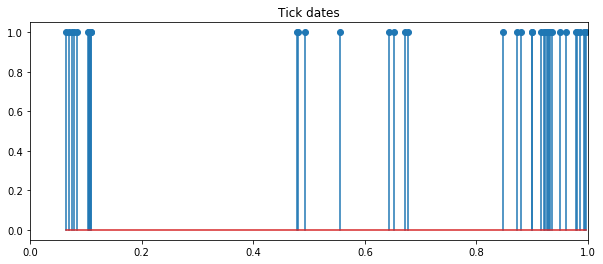

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.set_xlim(0, 1)
plt.stem(time_vec[0], np.ones(len(time_vec[0])))
plt.title('Tick dates')
plt.show()

In [13]:
from tick.hawkes import SimuHawkes, HawkesKernelPowerLaw

In [14]:
multiplier = 0.1
cutoff = 0.1
exponent = 1.7

support = 1

hawkes_p = SimuHawkes(
    kernels=[[HawkesKernelPowerLaw(multiplier, cutoff, exponent, support)]],
    baseline=baseline, seed=382, verbose=True )
hawkes_p.end_time =1
hawkes_p.simulate()

----------------------------------------
Launching simulation using SimuHawkes...
Done simulating using SimuHawkes in 4.97e-03 seconds.


In [15]:
hawkes_p.timestamps

[array([0.40494038, 0.42973258, 0.49643351, 0.67707585, 0.68984118,
        0.71968077, 0.74181867, 0.82305479, 0.84527769, 0.85169352,
        0.85782383, 0.87221336, 0.8864638 , 0.92206126, 0.92657504,
        0.96340005, 0.97132888])]

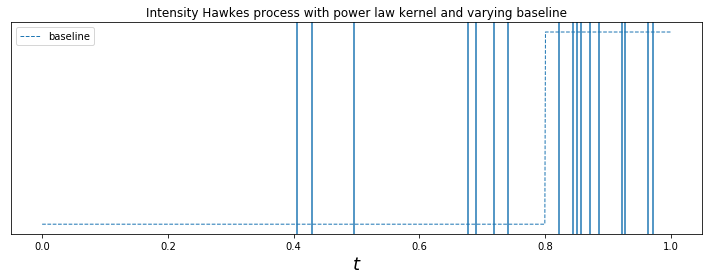

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

plot_point_process(hawkes_p, ax=ax)

t_values = np.linspace(0, hawkes_p.end_time, 1000)
ax.plot(t_values, hawkes_p.get_baseline_values(0, t_values), label='baseline',
        ls='--', lw=1)
ax.set_ylabel("$\lambda(t)$", fontsize=18)
ax.legend()

plt.title("Intensity Hawkes process with power law kernel and varying "
          "baseline")
fig.tight_layout()
plt.show()

With constant baseline

In [17]:
hawkes_c = SimuHawkesExpKernels(adjacency_exp, decay_exp, baseline=[mu_0], end_time=period_length,
                              seed=2093, verbose=True, force_simulation=True)
hawkes_c.track_intensity(0.01)
hawkes_c.simulate()

--------------------------------------------------
Launching simulation using SimuHawkesExpKernels...
Done simulating using SimuHawkesExpKernels in 1.18e-03 seconds.


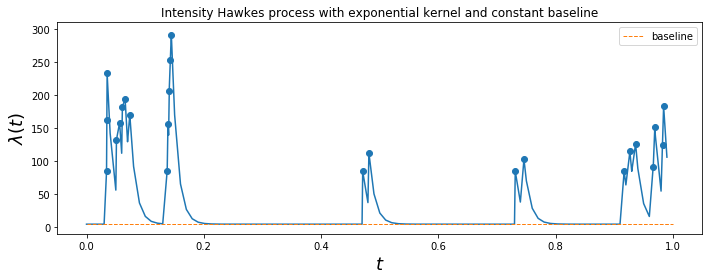

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

plot_point_process(hawkes_c, ax=ax)

t_values = np.linspace(0, hawkes_c.end_time, 1000)
ax.plot(t_values, hawkes_c.get_baseline_values(0, t_values), label='baseline',
        ls='--', lw=1)
ax.set_ylabel("$\lambda(t)$", fontsize=18)
ax.legend()

plt.title("Intensity Hawkes process with exponential kernel and constant "
          "baseline")
fig.tight_layout()
plt.show()

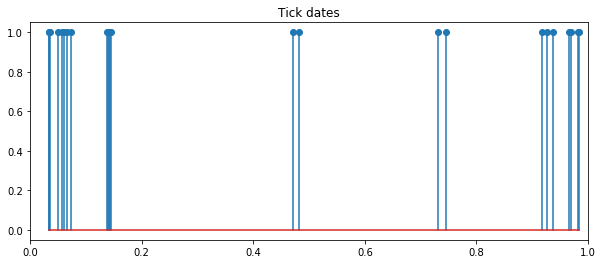

In [19]:
time_vec_c= hawkes_c.timestamps

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.set_xlim(0, 1)
plt.stem(time_vec_c[0], np.ones(len(time_vec_c[0])))
plt.title('Tick dates')
plt.show()

In [20]:
hawkes_p_c = SimuHawkes(
    kernels=[[HawkesKernelPowerLaw(multiplier, cutoff, exponent, support)]],
    baseline=[mu_0], seed=382, verbose=True )
hawkes_p_c.end_time =1
hawkes_p_c.simulate()

----------------------------------------
Launching simulation using SimuHawkes...
Done simulating using SimuHawkes in 1.21e-03 seconds.


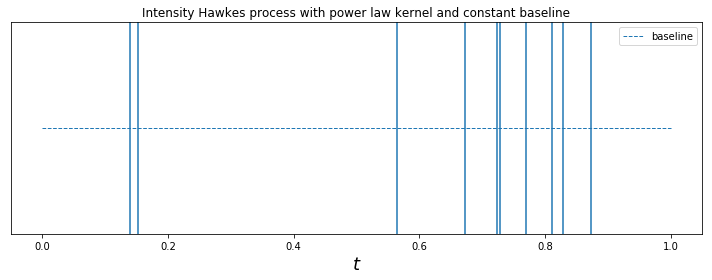

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

plot_point_process(hawkes_p_c, ax=ax)

t_values = np.linspace(0, hawkes_p_c.end_time, 1000)
ax.plot(t_values, hawkes_p_c.get_baseline_values(0, t_values), label='baseline',
        ls='--', lw=1)
ax.set_ylabel("$\lambda(t)$", fontsize=18)
ax.legend()

plt.title("Intensity Hawkes process with power law kernel and constant "
          "baseline")
fig.tight_layout()
plt.show()

In [35]:
import csv
N_simul=100

In [23]:
timestamps_list_c = []
np.random.seed(seed=1789)
for i in range(N_simul) :
    hawkes_i = SimuHawkesExpKernels(adjacency_exp, decay_exp, baseline=[mu_0], end_time=period_length, verbose=False)
    hawkes_i.track_intensity(0.01)
    hawkes_i.simulate()
    timestamps_list_c.append(hawkes_i.timestamps[0])

In [24]:
timestamps_list_c

[array([0.17010679, 0.17359982, 0.17364211, 0.20232984, 0.49229402,
        0.50101554, 0.50173871, 0.50311387, 0.50357516, 0.5072694 ,
        0.50754157, 0.50899829, 0.50983137, 0.51361213, 0.51504948,
        0.51706671, 0.51786766, 0.51844828, 0.52007795, 0.52046684,
        0.52144014, 0.52329362, 0.52820936, 0.52915941, 0.52917441,
        0.52961326, 0.53502481, 0.5388879 , 0.53908417, 0.53938442,
        0.54241794, 0.54844455, 0.559965  , 0.68669837, 0.68759579,
        0.69254826, 0.69713539, 0.71386497, 0.87058456, 0.8765034 ,
        0.88337476, 0.88927238, 0.88969554]),
 array([0.00269264, 0.26766016, 0.33058336]),
 array([0.46815198, 0.54059592, 0.69097221, 0.69173779, 0.69536367,
        0.69836912, 0.70677576, 0.71296225, 0.71395921, 0.71447875,
        0.72888731, 0.73406293, 0.73616794, 0.73716004, 0.73748966,
        0.7444891 , 0.75458591, 0.90637796, 0.91434072, 0.92091377,
        0.92276311, 0.92566319, 0.93653951, 0.94167332, 0.95604244,
        0.96227387, 0.96

In [ ]:
len(timestamps_list_c)

In [25]:
import csv

with open('timestamps_exp_cst.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(timestamps_list_c)

In [36]:
timestamps_list = []
np.random.seed(seed=1789)
for i in range(N_simul) :
    hawkes_i = SimuHawkesExpKernels(adjacency_exp, decay_exp, baseline=baseline, end_time=period_length, verbose=False)
    hawkes_i.track_intensity(0.01)
    hawkes_i.simulate()
    timestamps_list.append(hawkes_i.timestamps[0])

In [37]:
len(timestamps_list)

100

In [38]:
with open('timestamps_exp.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(timestamps_list)

In [ ]:
timestamps_list_p = []
np.random.seed(seed=1789)
for i in range(N_simul) :
    hawkes_i = SimuHawkes(kernels=[[HawkesKernelPowerLaw(multiplier, cutoff, exponent, support)]],
    baseline=baseline, verbose=False)
    hawkes_i.track_intensity(0.01)
    hawkes_i.end_time = 1
    hawkes_i.simulate()
    timestamps_list_p.append(hawkes_i.timestamps[0])

In [ ]:
timestamps_list_p

In [ ]:
with open('timestamps_pow.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(timestamps_list_p)

In [ ]:
timestamps_list_p_c = []
np.random.seed(seed=1789)
for i in range(N_simul) :
    hawkes_i = SimuHawkes(kernels=[[HawkesKernelPowerLaw(multiplier, cutoff, exponent, support)]],
    baseline=[mu_0], verbose=False)
    hawkes_i.track_intensity(0.01)
    hawkes_i.end_time = 1
    hawkes_i.simulate()
    timestamps_list_p_c.append(hawkes_i.timestamps[0])

In [ ]:
with open('timestamps_pow_cst.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(timestamps_list_p_c)